# İbrahim AYDIN-Y220237017 Yazılım Müh. YL (Tezli) 2.Dönem "Metin Madenciliği" Dersi Final Ödevi - 2023

### Mağaza Yorumlarından Makine Öğrenmesi ve Regresyon Modellerinin Oluşturulması ve Doğruluk Oranlarının Karşılaştırılması

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train_df = pd.read_csv("magaza_yorumlari_duygu_analizi.csv",encoding = "utf16")
test_df = pd.read_csv("magaza_yorumlari_duygu_analizi.csv", encoding = "utf16")
train_df = train_df.copy()

In [5]:
train_df.head(10)

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
5,Giriş seviyesindeki kullanıcılar için kabul ed...,Tarafsız
6,kullanisli baya,Olumlu
7,Dezavantajlar : Pahalı ürün<br />Merhabalar bu...,Tarafsız
8,ÜRÜN GÜZEL BU PARALARA BAŞKA BULAMAZSINIZ,Tarafsız
9,Tasarım ve kalite iyi olmasına rağmen yazma hı...,Tarafsız


In [6]:
train_df["Görüş"] = train_df["Görüş"].apply(lambda x: " ".join(i.lower() for i in str(x).split()))

In [7]:
train_df["Görüş"] = train_df["Görüş"].str.replace("[^\w\s]","")

C:\Users\Casper\AppData\Local\Temp\ipykernel_19304\2479347470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["Görüş"] = train_df["Görüş"].str.replace("[^\w\s]","")


In [8]:
train_df["Görüş"] = train_df["Görüş"].str.replace("\d","")

C:\Users\Casper\AppData\Local\Temp\ipykernel_19304\206667332.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["Görüş"] = train_df["Görüş"].str.replace("\d","")


In [9]:
train_df

,Görüş,Durum
0,ses kalitesi ve ergonomisi rezalet sony olduğu...,Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süpergece çalıştır sıkıntı yokkablo ...,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,kulaklığın sesi kaliteli falan değil aleti öve...,Olumsuz
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,Tarafsız
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,Tarafsız
11426,bu cihazı yıldır kullanıyorum cihazı çok beğe...,Olumsuz
11427,bir sene olmadı ayar düğmesine basıyorum ekran...,Tarafsız


In [10]:
!pip install nltk

In [11]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Casper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bilgisayar dilinde, etkisiz kelimeler (stopwords), doğal data dilinin (text) işlenmeden önce veya sonra filtrelenmiş kelimeleridir. Kelimeler arasındaki etkileşimin daha iyi yorumlanabilmesi için bu kelimelerin yorumlardan silinmesi gerekmektedir. Listemizde türkçe için var olan etkisiz elemanları incelemek için örnek olarak "sw" yazarak inceleyebiliriz.

In [12]:
sw = stopwords.words("turkish")

In [13]:
sw.append("bir")

In [14]:
train_df["Görüş"] = train_df["Görüş"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [15]:
len(pd.Series(" ".join(train_df["Görüş"]).split()).value_counts())

35941

## TOKENIZATION


Bütün bir yazıyı oluşturan her bir sözcüğü ayırma işlemidir. Yorumlarda geçen kelimeler parçalanarak liste halinde tutulur.

In [16]:
!pip install textblob

In [17]:
import textblob
from textblob import TextBlob

In [18]:
train_df["Görüş"] = train_df["Görüş"] = train_df["Görüş"].apply(lambda x: TextBlob(x).words)

## STEMMING 

Yorumlar içinde var olan kelimelerin köklerini bularak eklerini silerek eksiz halini oluşturur. Türkçe desteği tam sağlanmadığı için aşağılarda göreceğimiz görselleştirme işlemlerinde bazı kelimelerin köklerinin bulunamadığı görüldü.

In [19]:
!pip install snowballstemmer

In [20]:
from snowballstemmer import TurkishStemmer
turkStem=TurkishStemmer()

In [21]:
?turkStem

Type:        TurkishStemmer
String form: <snowballstemmer.turkish_stemmer.TurkishStemmer object at 0x00000204445AAB50>
File:        c:\programdata\anaconda3\lib\site-packages\snowballstemmer\turkish_stemmer.py
Docstring:  
This class implements the stemming algorithm defined by a snowball script.
Generated by Snowball 2.2.0 - https://snowballstem.org/


In [22]:
train_df["Görüş"] = train_df["Görüş"].apply(lambda x: " ".join(turkStem.stemWord(i) for i in str(x).split()))

## NLP UYGULAMALARI

In [23]:
TextBlob(str(train_df["Görüş"])).ngrams(3)

[WordList(['0', "'ses", "'kalitesi"]),
 WordList(["'ses", "'kalitesi", "'ergonomisi"]),
 WordList(["'kalitesi", "'ergonomisi", "'rezalet"]),
 WordList(["'ergonomisi", "'rezalet", '1']),
 WordList(["'rezalet", '1', "'hizli"]),
 WordList(['1', "'hizli", "'teslimat"]),
 WordList(["'hizli", "'teslimat", "'tesekkürler"]),
 WordList(["'teslimat", "'tesekkürler", '2']),
 WordList(["'tesekkürler", '2', "'ses"]),
 WordList(['2', "'ses", "'olayı"]),
 WordList(["'ses", "'olayı", "'süpergece"]),
 WordList(["'olayı", "'süpergece", "'çalıştır"]),
 WordList(["'süpergece", "'çalıştır", "'sık"]),
 WordList(["'çalıştır", "'sık", '3']),
 WordList(["'sık", '3', "'geldi"]),
 WordList(['3', "'geldi", "'bigün"]),
 WordList(["'geldi", "'bigün", "'kullandık"]),
 WordList(["'bigün", "'kullandık", "'hemen"]),
 WordList(["'kullandık", "'hemen", "'bozo"]),
 WordList(["'hemen", "'bozo", '4']),
 WordList(["'bozo", '4', "'kulaklığın"]),
 WordList(['4', "'kulaklığın", "'sesi"]),
 WordList(["'kulaklığın", "'sesi", "'ka

## Part of speech tagging (POS)

In [24]:
nltk.download("averaged_perceptron_tagger")
train_df["Görüş"].apply(lambda x: TextBlob(str(x)).tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Casper\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        [([, JJ), ('ses, NNS), (', POS), ('kalitesi, N...
1        [([, JJ), ('hizli, NNP), (', POS), ('teslimat,...
2        [([, JJ), ('ses, NNS), (', POS), ('olayı, NNP)...
3        [([, JJ), ('geldi, NNP), (', POS), ('bigün, NN...
4        [([, JJ), ('kulaklığın, NNP), (', POS), ('sesi...
                               ...                        
11424    [([, JJ), ('biraz, NNP), (', POS), ('fazla, NN...
11425    [([, JJ), ('orijinal, NNP), (', POS), ('ürün, ...
11426    [([, JJ), ('cihazı, NNP), (', POS), ('yıldır, ...
11427    [([, JJ), ('sene, NNP), (', POS), ('olmadı, NN...
11428    [([, JJ), ('urun, NNP), (', POS), ('zamaninda,...
Name: Görüş, Length: 11429, dtype: object

## BASİT MATEMATİKSEL İŞLEMER

In [25]:
math_train_df = train_df.copy()

In [26]:
math_train_df["harf_sayisi"] = math_train_df["Görüş"].str.len()
math_train_df

,Görüş,Durum,harf_sayisi
0,"['ses', 'kalitesi', 'ergonomisi', 'rezalet', '...",Olumsuz,169
1,"['hizli', 'teslimat', 'tesekkürler']",Tarafsız,36
2,"['ses', 'olayı', 'süpergece', 'çalıştır', 'sık...",Olumlu,204
3,"['geldi', 'bigün', 'kullandık', 'hemen', 'bozo...",Olumsuz,74
4,"['kulaklığın', 'sesi', 'kaliteli', 'falan', 'd...",Olumsuz,485
...,...,...,...
11424,"['biraz', 'fazla', 'ısınıyor', 'sorumsuz', 'ça...",Tarafsız,55
11425,"['orijinal', 'ürün', 'fakat', 'ambalaj', 'bize...",Tarafsız,95
11426,"['cihazı', 'yıldır', 'kullanıyorum', 'cihazı',...",Olumsuz,244
11427,"['sene', 'olmadı', 'ayar', 'düğmesine', 'basıy...",Tarafsız,81


In [27]:
math_train_df["kelime_sayisi"] = math_train_df["Görüş"].apply(lambda x: len(str(x).split(",")))
math_train_df

,Görüş,Durum,harf_sayisi,kelime_sayisi
0,"['ses', 'kalitesi', 'ergonomisi', 'rezalet', '...",Olumsuz,169,16
1,"['hizli', 'teslimat', 'tesekkürler']",Tarafsız,36,3
2,"['ses', 'olayı', 'süpergece', 'çalıştır', 'sık...",Olumlu,204,19
3,"['geldi', 'bigün', 'kullandık', 'hemen', 'bozo...",Olumsuz,74,7
4,"['kulaklığın', 'sesi', 'kaliteli', 'falan', 'd...",Olumsuz,485,49
...,...,...,...,...
11424,"['biraz', 'fazla', 'ısınıyor', 'sorumsuz', 'ça...",Tarafsız,55,5
11425,"['orijinal', 'ürün', 'fakat', 'ambalaj', 'bize...",Tarafsız,95,10
11426,"['cihazı', 'yıldır', 'kullanıyorum', 'cihazı',...",Olumsuz,244,23
11427,"['sene', 'olmadı', 'ayar', 'düğmesine', 'basıy...",Tarafsız,81,8


## TARAFSIZ OLAN YORUMLARIN SİLİNMESİ

In [28]:
math_train_df.loc[math_train_df["Durum"] == "Tarafsız", "Durum"] = np.nan
math_train_df.dropna(inplace = True)
math_train_df

,Görüş,Durum,harf_sayisi,kelime_sayisi
0,"['ses', 'kalitesi', 'ergonomisi', 'rezalet', '...",Olumsuz,169,16
2,"['ses', 'olayı', 'süpergece', 'çalıştır', 'sık...",Olumlu,204,19
3,"['geldi', 'bigün', 'kullandık', 'hemen', 'bozo...",Olumsuz,74,7
4,"['kulaklığın', 'sesi', 'kaliteli', 'falan', 'd...",Olumsuz,485,49
6,"['kullanisli', 'baya']",Olumlu,22,2
...,...,...,...,...
11421,"['yaklaşık', 'ay', 'önce', 'anneme', 'aldım', ...",Olumlu,336,31
11422,"['beğendim', 'hızlı', 'pişiriyor']",Olumlu,34,3
11423,"['ürünü', 'ana', 'kadar', 'beğendim', 'standar...",Olumlu,259,24
11426,"['cihazı', 'yıldır', 'kullanıyorum', 'cihazı',...",Olumsuz,244,23


## GÖRSELLEŞTİRME

In [29]:
tf1 = (math_train_df["Görüş"]).apply(lambda x: 
                             pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [30]:
tf1.columns = ["words","tf"]

In [31]:
tf1.head()


,words,tf
0,"['ses',",44.0
1,"'kalitesi',",271.0
2,"'ergonomisi',",2.0
3,"'rezalet',",30.0
4,"'sony',",14.0


In [32]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31440 entries, 0 to 31439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   31440 non-null  object 
 1   tf      31440 non-null  float64
dtypes: float64(1), object(1)
memory usage: 491.4+ KB


In [33]:
tf1.nunique()

words    31440
tf         228
dtype: int64

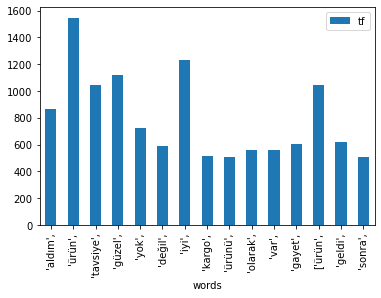

In [34]:
a = tf1[tf1["tf"] > 500]
a.plot.bar(x = "words", y = "tf");

## WOLDCLOUD


In [35]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [37]:
text = " ".join(i for i in math_train_df.Görüş)

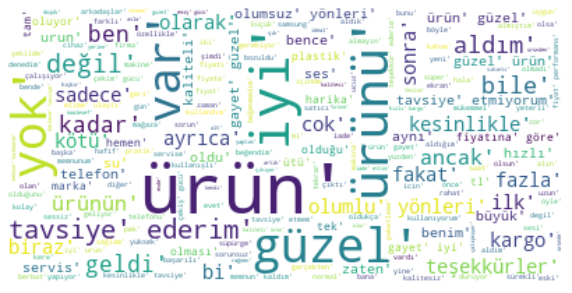

In [38]:
wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## DUYGU ANALİZİ VE MODEL OLUŞTURMA

In [39]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [40]:
df = pd.DataFrame()
df["text"] = math_train_df["Görüş"]
df["label"] = math_train_df["Durum"]

## DEĞİŞKEN MÜHENDİSLİĞİ

In [41]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["label"], 
                                                                    random_state = 1)

In [42]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

## COUNT VECTORİZER


    Count Vectors
    TF-IDF Vectors (words, characters, n-grams)
    Word Embeddings

TF(t) = (Bir t teriminin bir dökümanda gözlenme frekansı) / (dökümandaki toplam terim sayısı)

IDF(t) = log_e(Toplam döküman sayısı / içinde t terimi olan belge sayısı)


In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [44]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [45]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaaa', 'aaaaaaaaaaaaaaaaa', 'aantajı', 'abartilacak']

In [46]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## TF-IDF

In [47]:
#wordlevel

In [48]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

TfidfVectorizer()

In [49]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [50]:
tf_idf_word_vectorizer.get_feature_names()[0:5]

['aaa', 'aaaa', 'aaaaaaaaaaaaaaaaa', 'aantajı', 'abartilacak']

In [51]:
x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
# ngram level tf-idf

In [53]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)

TfidfVectorizer(ngram_range=(2, 3))

In [54]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

In [55]:
# characters level tf-idf

In [56]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [57]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

## MAKİNE ÖĞRENMESİ VE REGRESYON MODELLERİNİN OLUŞTURULMASI

### LOJİSTİK REGRESYON

In [58]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8813048099920276


In [59]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.876587828859952


In [60]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.7781446540880503


In [61]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.8605788820976172


### NAVİE BAYES

In [62]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8921184338736824


In [63]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.8911794667375321


In [64]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.7654043759411817


In [65]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.843168128266454


### RANDOM FOREST

In [66]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8600894676233501


In [67]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

Word-Level TF-IDF Doğruluk Oranı: 0.8586743732837274


In [68]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

N-GRAM TF-IDF Doğruluk Oranı: 0.7526995305164319


In [69]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

CHARLEVEL Doğruluk Oranı: 0.8328018425015502


### XGBoost

In [70]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

[21:13:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:13:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:13:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:00] WARNING:

In [71]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy)

[21:14:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:10] WARNING:

In [72]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_ngram,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_ngram, 
                                           test_y, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy)

[21:14:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:27] WARNING:

In [73]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_chars,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_chars, 
                                           test_y, 
                                           cv = 10).mean()

print("CHARLEVEL Doğruluk Oranı:", accuracy)

[21:14:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:20] WARNING: